### 데이터 분석

In [1]:
import pandas as pd
import seaborn as sns
import platform
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt

In [2]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

### 데이터 불러오기

In [3]:
data = pd.read_csv("result.csv")

In [4]:
data.shape

(590, 5)

In [5]:
# 컬럼명 변경
data.columns = ["날짜","코로나 확진자", "비트코인", "코스피", "뉴스(개수)"]
data.head(3)

,날짜,코로나 확진자,비트코인,코스피,뉴스(개수)
0,2020-01-20,1,9884000.0,2262.639893,273
1,2020-01-21,0,9878000.0,2239.689941,432
2,2020-01-22,0,9887000.0,2267.250000,563


### 코로나와 비트코인 종가의 상관관계 분석

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       590 non-null    object 
 1   코로나 확진자  590 non-null    int64  
 2   비트코인     590 non-null    float64
 3   코스피      400 non-null    float64
 4   뉴스(개수)   590 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 23.2+ KB


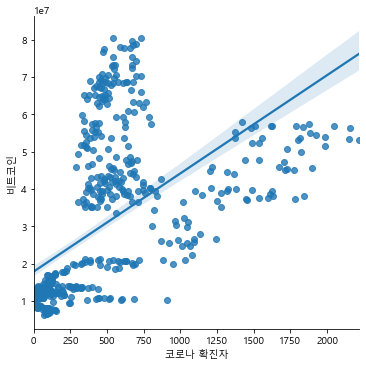

In [9]:
sns.lmplot(x = "코로나 확진자", y = "비트코인", data = data)
plt.gcf().savefig("코로나_비트코인_상관관계.png")

In [10]:
data[["코로나 확진자", "비트코인"]].corr()

,코로나 확진자,비트코인
코로나 확진자,1.000000,0.590204
비트코인,0.590204,1.000000


### 코로나와 뉴스 개수 데이터의 상관관계 분석

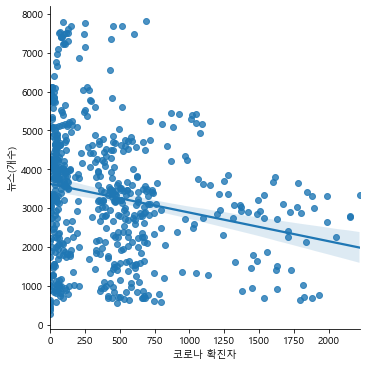

In [11]:
sns.lmplot(x = "코로나 확진자", y = "뉴스(개수)", data = data)
plt.gcf().savefig("코로나_뉴스(개수)_상관관계.png")

In [12]:
data[["코로나 확진자", "뉴스(개수)"]].corr()

,코로나 확진자,뉴스(개수)
코로나 확진자,1.000000,-0.208966
뉴스(개수),-0.208966,1.000000


* 코로나 확진자가 많이 나온 다음날 또는 다다음날에 뉴스가 많이 나오지 않을까
    * 결과 : 뉴스 데이터를 하루, 이틀 뒤로 밀어도 상관관계는 낮다.
* 뉴스 데이터의 키워드를 코로나가 아닌 확진자로 하면 상관관계가 높아지지 않을까
* 상관관계 -> 인과관계
    * 뉴스 개수가 많아지면 확진자가 줄어들게 된다. 
        * 사람들이 조심하게 된다.
    * 뉴스 개수가 적어지면 확진자가 많아지게 된다.

### 날짜별 코로나 확진자 barplot

<AxesSubplot:xlabel='날짜', ylabel='코로나 확진자'>

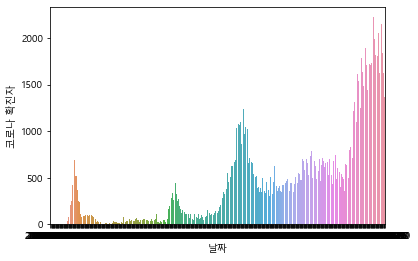

In [13]:
sns.barplot(x = "날짜", y = "코로나 확진자", data = data)

### 날짜별 코로나 확진자, 뉴스(개수) lineplot

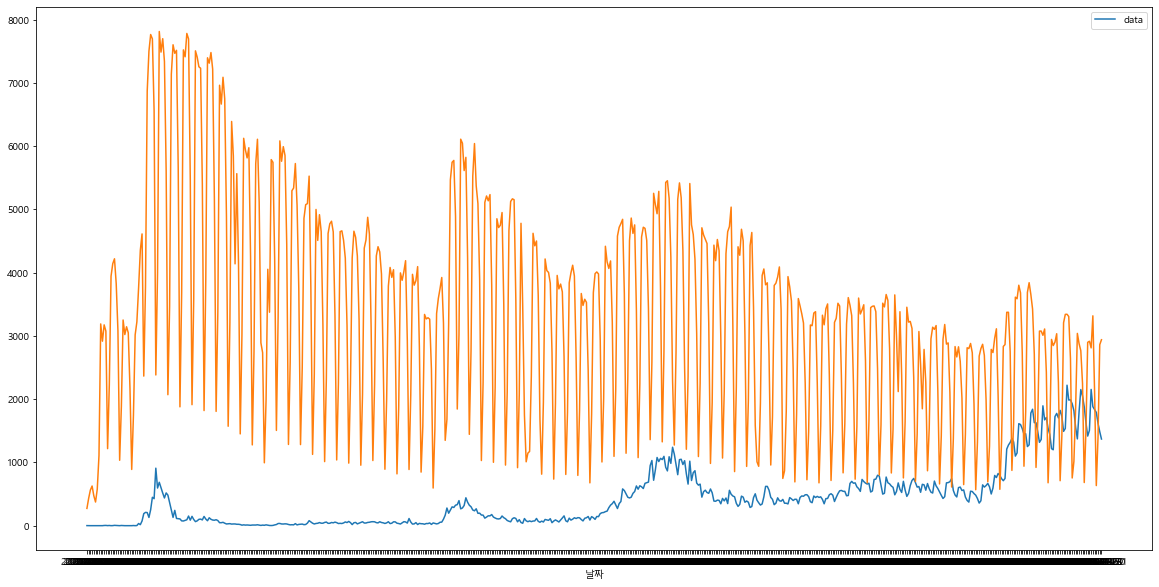

In [14]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.plot(data["날짜"], data["코로나 확진자"])
plt.plot(data["날짜"], data["뉴스(개수)"])
plt.xlabel("날짜")
plt.legend(["data"])
plt.show()

<AxesSubplot:>

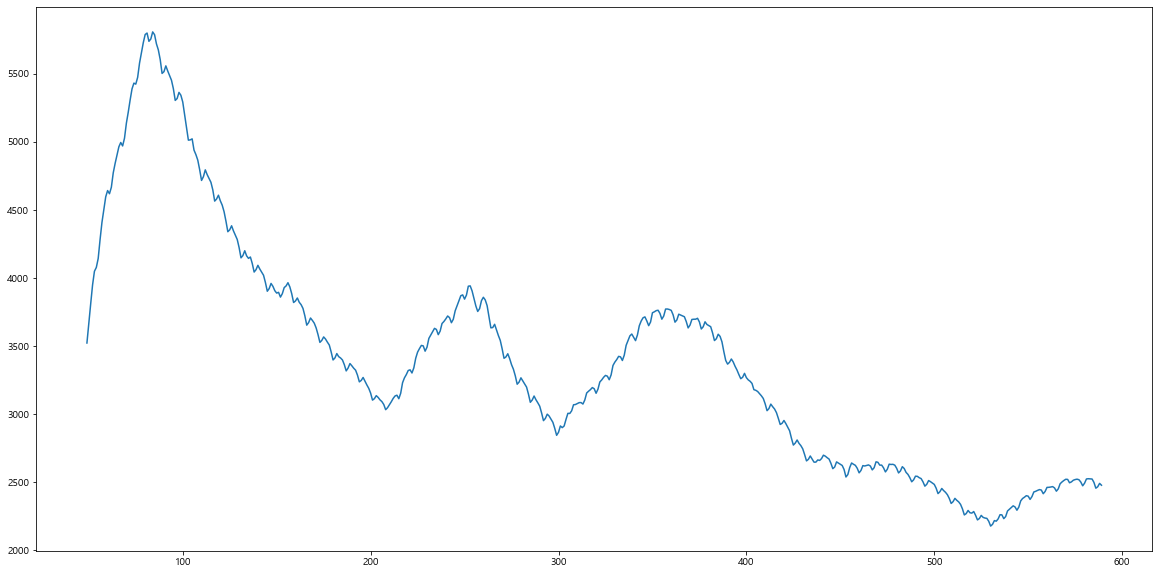

In [18]:
# data["계(명)_5"] = data["계(명)"].rolling(5).mean()
# data["코로나_확진자_20"] = data["코로나 확진자"].rolling(20).mean()
# data["뉴스_20"] = data["뉴스(개수)"].rolling(20).mean()
#data["계(명)_50"] = data["계(명)"].rolling(100).mean()
data["뉴스_50"] = data["뉴스(개수)"].rolling(50).mean()
# data[‘Close’].plot()
# data[‘rolling5’].plot()
# data["계(명)"].plot()
# data["계(명)_5"].plot()
# data["코로나_확진자_20"].plot()
# data["뉴스_20"].plot()
# data["계(명)_50"].plot()
data["뉴스_50"].plot()
# plt.gcf().savefig("test.png")

In [16]:
data[["계(명)_50", "뉴스_50"]].corr()

KeyError: "['계(명)_50'] not in index"

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   날짜          590 non-null    object 
 1   코로나 확진자     590 non-null    int64  
 2   비트코인        590 non-null    float64
 3   코스피         400 non-null    float64
 4   뉴스(개수)      590 non-null    int64  
 5   코로나_확진자_20  571 non-null    float64
 6   뉴스_20       571 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 32.4+ KB


### 날짜별 3일 뒤 뉴스 개수 매칭

In [19]:
data_tmp = data.iloc[0:587, 0 : 2]
tmp = data.iloc[3:, 4:5]
tmp =tmp.reset_index()
tmp.drop(["index"], axis = 1, inplace = True)
tmp
data_tmp["뉴스"] = tmp
data_tmp
# data_tmp["코로나"] = 

,날짜,코로나 확진자,뉴스
0,2020-01-20,1,627
1,2020-01-21,0,473
2,2020-01-22,0,374
3,2020-01-23,0,577
4,2020-01-24,1,1109
...,...,...,...
582,2021-08-24,1507,2120
583,2021-08-25,2154,634
584,2021-08-26,1882,1399
585,2021-08-27,1837,2862


In [20]:
data_tmp[["계(명)", "뉴스"]].corr()

KeyError: "['계(명)'] not in index"

### 코로나와 주식(코스피 종가) 데이터의 상관관계 분석

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   날짜          590 non-null    object 
 1   코로나 확진자     590 non-null    int64  
 2   비트코인        590 non-null    float64
 3   코스피         400 non-null    float64
 4   뉴스(개수)      590 non-null    int64  
 5   코로나_확진자_20  571 non-null    float64
 6   뉴스_20       571 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 32.4+ KB


In [129]:
data.head(10)

,날짜,코로나 확진자,비트코인,코스피,뉴스(개수),코로나_확진자_20,뉴스_20
0,2020-01-20,1,9884000.0,2262.639893,273,NaN,NaN
1,2020-01-21,0,9878000.0,2239.689941,432,NaN,NaN
2,2020-01-22,0,9887000.0,2267.250000,563,NaN,NaN
3,2020-01-23,0,9661000.0,2246.129883,627,NaN,NaN
4,2020-01-24,1,9830000.0,NaN,473,NaN,NaN
5,2020-01-25,0,9692000.0,NaN,374,NaN,NaN
6,2020-01-26,1,9841000.0,NaN,577,NaN,NaN
7,2020-01-27,1,10050000.0,NaN,1109,NaN,NaN
8,2020-01-28,0,10282000.0,2176.719971,3190,NaN,NaN
9,2020-01-29,0,10651000.0,2185.280029,2917,NaN,NaN


In [131]:
co_kospi = pd.read_csv("./CSV/corona_kospi.csv")
co_kospi.columns = ["날짜", "코스피", "코로나 확진자"]
co_kospi.head(3)

,날짜,코스피,코로나 확진자
0,2020-01-20,2262.639893,1
1,2020-01-21,2239.689941,0
2,2020-01-22,2267.250000,0


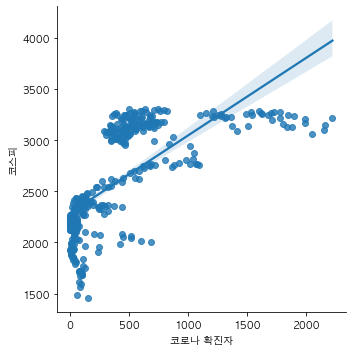

In [132]:
sns.lmplot(x = "코로나 확진자", y = "코스피", data = co_kospi)
plt.gcf().savefig("./PNG/코로나_코스피_상관관계.png")

In [133]:
co_kospi[["코로나 확진자", "코스피"]].corr()

,코로나 확진자,코스피
코로나 확진자,1.000000,0.698671
코스피,0.698671,1.000000


* 0.69정도의 상관관계가 있다.

### 비트코인과 주식(코스피 종가) 데이터의 상관관계 분석

In [134]:
data[['비트코인','코스피']].corr()

,비트코인,코스피
비트코인,1.000000,0.861515
코스피,0.861515,1.000000


In [136]:
data[['코로나 확진자', '뉴스(개수)','비트코인', '코스피']].corr()

,코로나 확진자,뉴스(개수),비트코인,코스피
코로나 확진자,1.000000,-0.208966,0.590204,0.698671
뉴스(개수),-0.208966,1.000000,-0.337311,-0.622824
비트코인,0.590204,-0.337311,1.000000,0.861515
코스피,0.698671,-0.622824,0.861515,1.000000


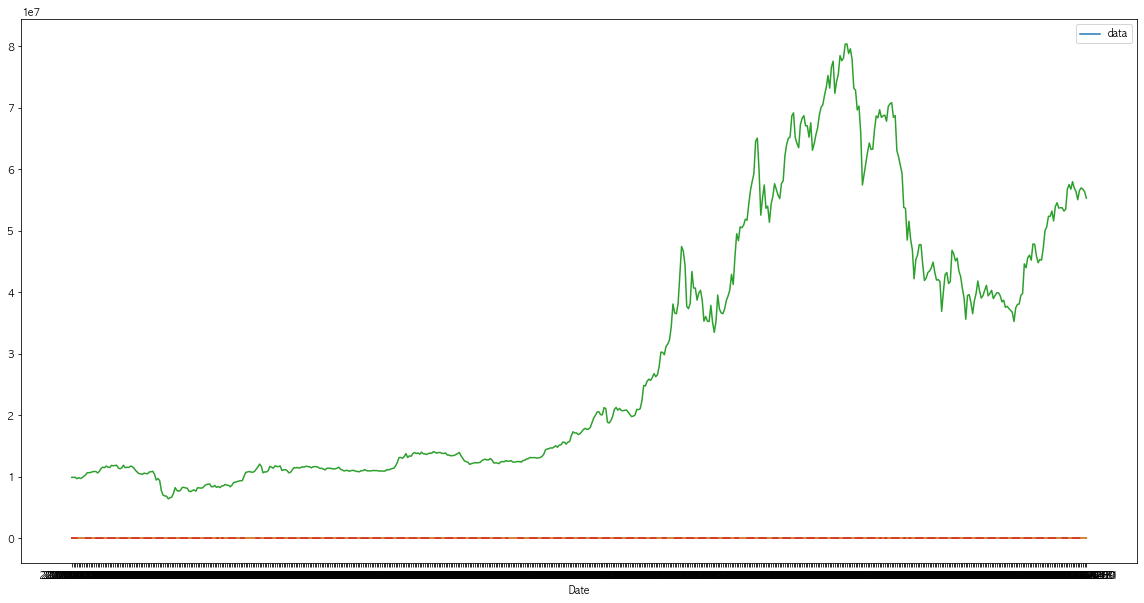

In [100]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.plot(data["일자"], data["계(명)"])
plt.plot(data["일자"], data["뉴스 개수"])
plt.plot(data["일자"], data["bitcoin"])
plt.plot(data["일자"], data["kospi"])
plt.xlabel("Date")
plt.legend(["data"])
plt.show()

### 코로나, 뉴스 개수 상관관계
    * 코로나 확진자가 많이 나온 다음날 또는 다다음날에 뉴스가 많이 나오지 않을까
        * 결과 : 뉴스 데이터를 하루, 이틀 뒤로 밀어도 상관관계는 낮다.
    * 뉴스 데이터의 키워드를 코로나가 아닌 확진자로 하면 상관관계가 높아지지 않을까
    * 상관관계 -> 인과관계
    * 뉴스 개수가 많아지면 확진자가 줄어들게 된다.
        * 사람들이 조심하게 된다.
    * 뉴스 개수가 적어지면 확진자가 많아지게 된다.
### 코로나, 비트코인 상관관계
    * 0.59 정도의 상관관계가 있다.
### 코로나, 주식(코스피) 상관관계
    * 0.69 정도의 상관관계가 있다.

### 비트코인과 코스피의 상관관계 분석

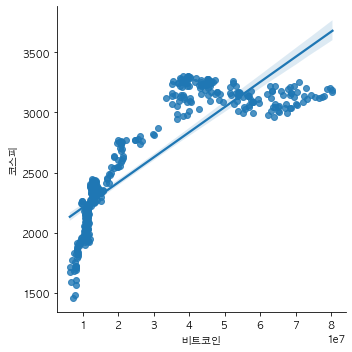

In [141]:
sns.lmplot(x = "비트코인", y = "코스피", data = data)
plt.gcf().savefig("./PNG/비트코인_코스피_상관관계.png")

In [142]:
data[["비트코인", "코스피"]].corr()

,비트코인,코스피
비트코인,1.000000,0.861515
코스피,0.861515,1.000000


### 뉴스(개수)와 비트코인의 상관관계 분석

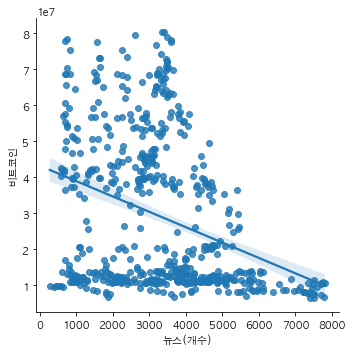

In [143]:
sns.lmplot(x = "뉴스(개수)", y = "비트코인", data = data)
plt.gcf().savefig("./PNG/뉴스(개수)_비트코인_상관관계.png")

In [144]:
data[["뉴스(개수)", "비트코인"]].corr()

,뉴스(개수),비트코인
뉴스(개수),1.000000,-0.337311
비트코인,-0.337311,1.000000


### 뉴스(개수)와 코스피의 상관관계 분석

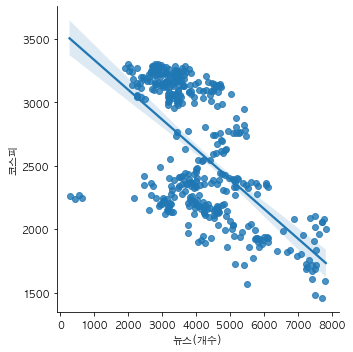

In [145]:
sns.lmplot(x = "뉴스(개수)", y = "코스피", data = data)
plt.gcf().savefig("./PNG/뉴스(개수)_코스피_상관관계.png")

In [146]:
data[["뉴스(개수)", "코스피"]].corr()

,뉴스(개수),코스피
뉴스(개수),1.000000,-0.622824
코스피,-0.622824,1.000000


In [148]:
# x / max * 100
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   날짜          590 non-null    object 
 1   코로나 확진자     590 non-null    int64  
 2   비트코인        590 non-null    float64
 3   코스피         400 non-null    float64
 4   뉴스(개수)      590 non-null    int64  
 5   코로나_확진자_20  571 non-null    float64
 6   뉴스_20       571 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 32.4+ KB


In [149]:
data["코로나(%)"] = data["코로나 확진자"] / data["코로나 확진자"].max() * 100
data["비트코인(%)"] = data["비트코인"] / data["비트코인"].max() * 100
data["코스피(%)"] = data["코스피"] / data["코스피"].max() * 100
data["뉴스(%)"] = data["뉴스(개수)"] / data["뉴스(개수)"].max() * 100

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   날짜          590 non-null    object 
 1   코로나 확진자     590 non-null    int64  
 2   비트코인        590 non-null    float64
 3   코스피         400 non-null    float64
 4   뉴스(개수)      590 non-null    int64  
 5   코로나_확진자_20  571 non-null    float64
 6   뉴스_20       571 non-null    float64
 7   코로나(%)      590 non-null    float64
 8   비트코인(%)     590 non-null    float64
 9   코스피(%)      400 non-null    float64
 10  뉴스(%)       590 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 50.8+ KB


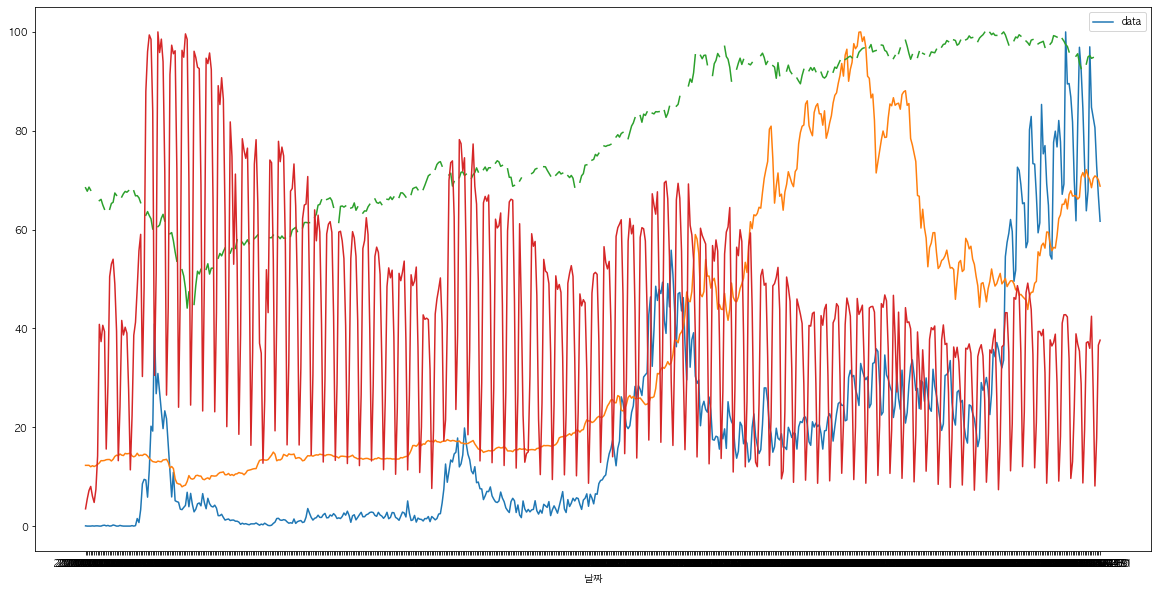

In [173]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.plot(data["날짜"], data["코로나(%)"])
plt.plot(data["날짜"], data["비트코인(%)"])
plt.plot(data["날짜"], data["코스피(%)"])
plt.plot(data["날짜"], data["뉴스(%)"])
plt.xlabel("날짜")
plt.legend(["data"])
plt.show()

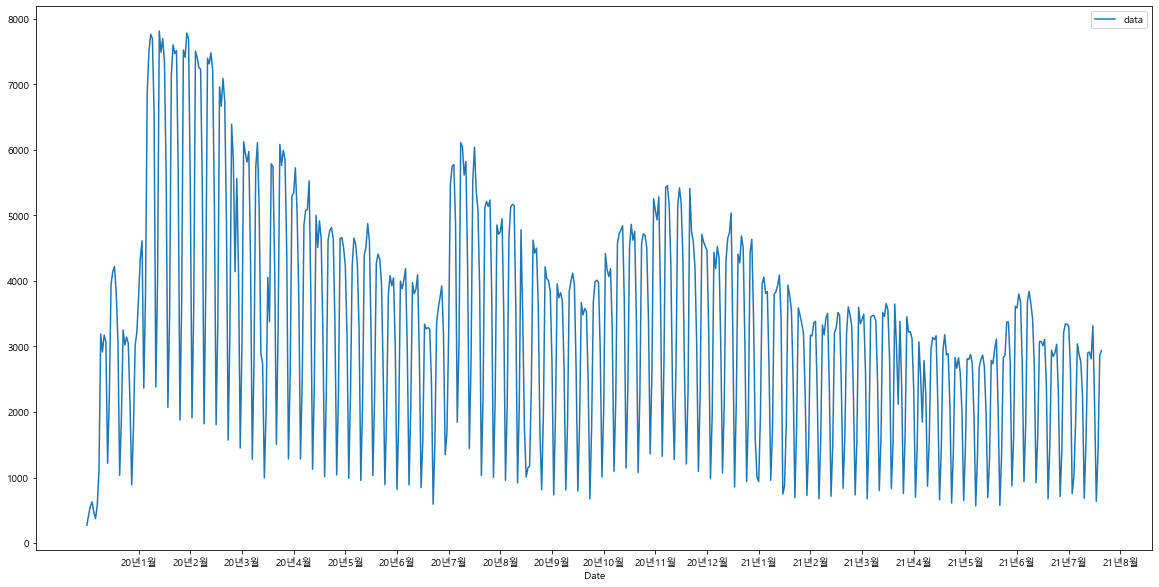

In [32]:
plt.rcParams["figure.figsize"] = (20, 10)
# plt.plot(data["일자"], data["계(명)"])
plt.plot(data["날짜"], data["뉴스(개수)"])
# plt.plot(data["날짜"], data["비트코인"])
# plt.plot(data["일자"], data["kospi"])

plt.xticks([30,60,90,120,150,180,210,240,270,300,330,360,390,420,450,480,510,540,570,600], 
           labels=['20년1월','20년2월','20년3월','20년4월','20년5월','20년6월','20년7월','20년8월'
                  ,'20년9월','20년10월','20년11월','20년12월','21년1월','21년2월','21년3월','21년4월'
                  ,'21년5월','21년6월','21년7월','21년8월'])
plt.xlabel("Date")
plt.legend(["data"])
plt.show()

In [169]:
data["뉴스(개수)"].head(3)

0    273
1    432
2    563
Name: 뉴스(개수), dtype: int64

### 비트코인_코스피_날짜별_그래프

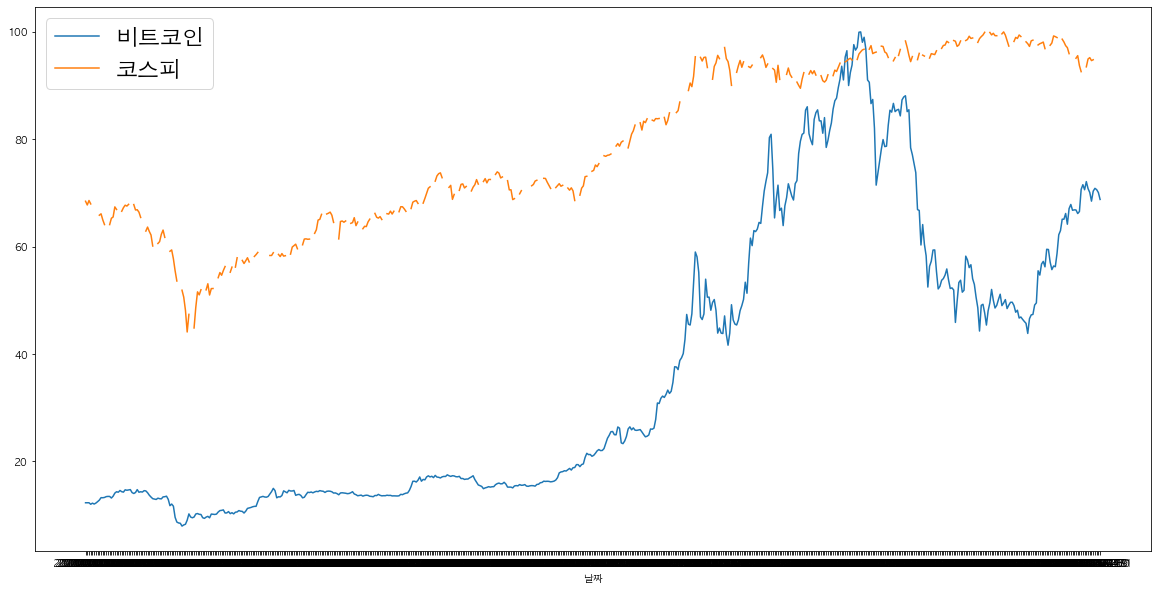

In [188]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.plot(data["날짜"], data["비트코인(%)"])
plt.plot(data["날짜"], data["코스피(%)"])
plt.xlabel("날짜")
plt.legend(["비트코인", "코스피"], fontsize = 22)
plt.gcf().savefig("./PNG/비트코인_코스피_날짜별_그래프.png")
plt.show()

### 코로나_코스피_날짜별_그래프

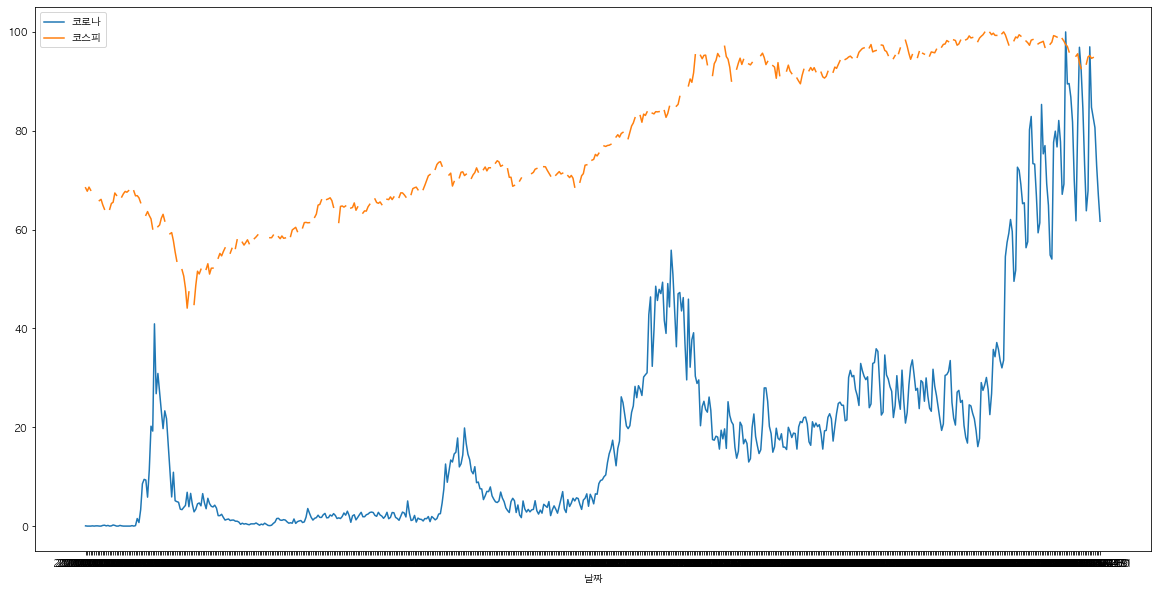

In [189]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.plot(data["날짜"], data["코로나(%)"])
plt.plot(data["날짜"], data["코스피(%)"])
plt.xlabel("날짜")
plt.legend(["코로나", "코스피"])
plt.gcf().savefig("./PNG/코로나_코스피_날짜별_그래프.png")
plt.show()

### 코로나와 비트코인의 날짜별 그래프

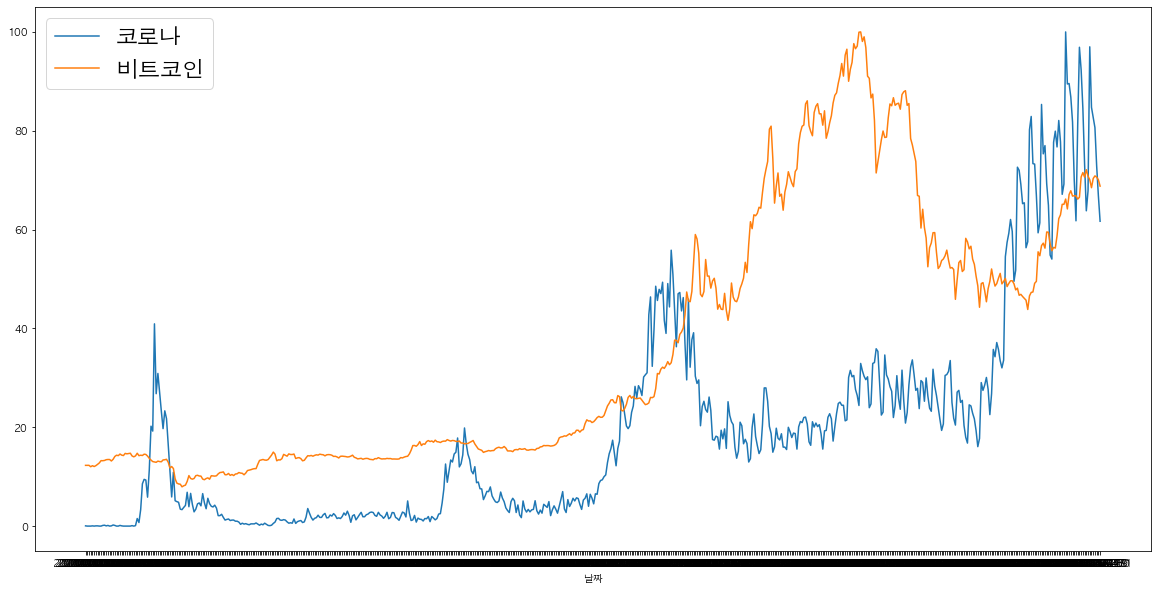

In [190]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.plot(data["날짜"], data["코로나(%)"])
plt.plot(data["날짜"], data["비트코인(%)"])
plt.xlabel("날짜")
plt.legend(["코로나", "비트코인"], fontsize = 22)
plt.gcf().savefig("./PNG/코로나_비트코인_날짜별_그래프.png")
plt.show()

### 뉴스(개수)와 비트코인의 날짜별 그래프

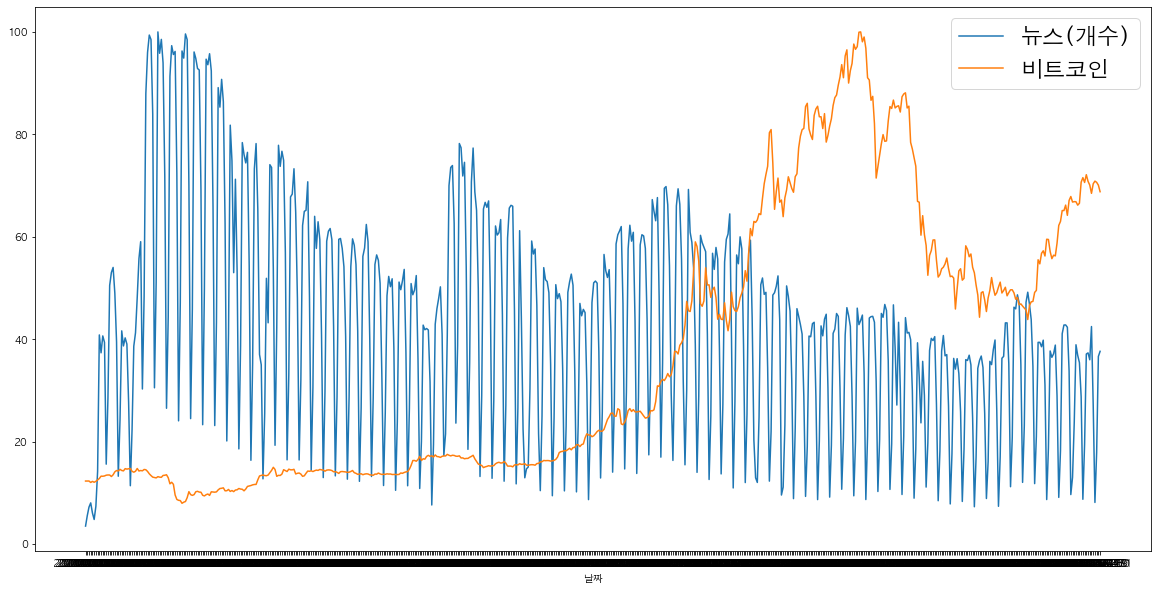

In [191]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.plot(data["날짜"], data["뉴스(%)"])
plt.plot(data["날짜"], data["비트코인(%)"])
plt.xlabel("날짜")
plt.legend(["뉴스(개수)", "비트코인"], fontsize = 22)
plt.gcf().savefig("./PNG/뉴스_비트코인_날짜별_그래프.png")
plt.show()

### 뉴스(개수)와 코스피의 날짜별 그래프

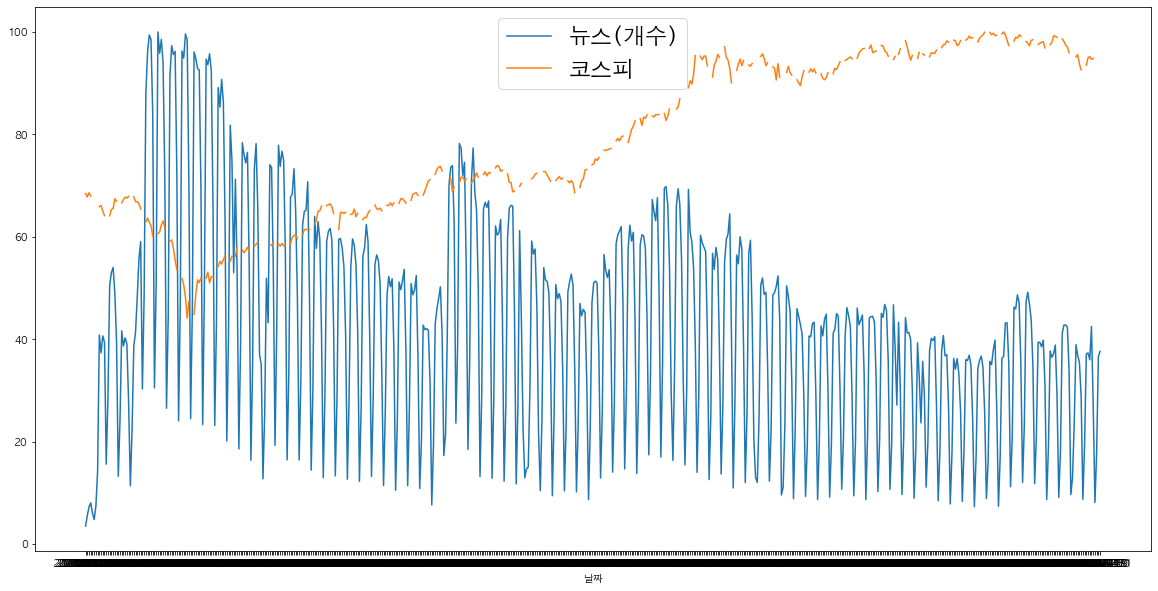

In [192]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.plot(data["날짜"], data["뉴스(%)"])
plt.plot(data["날짜"], data["코스피(%)"])
plt.xlabel("날짜")
plt.legend(["뉴스(개수)", "코스피"], fontsize = 22)
plt.gcf().savefig("./PNG/뉴스_코스피_날짜별_그래프.png")
plt.show()

### 코로나와 뉴스(개수)의 날짜별 그래프

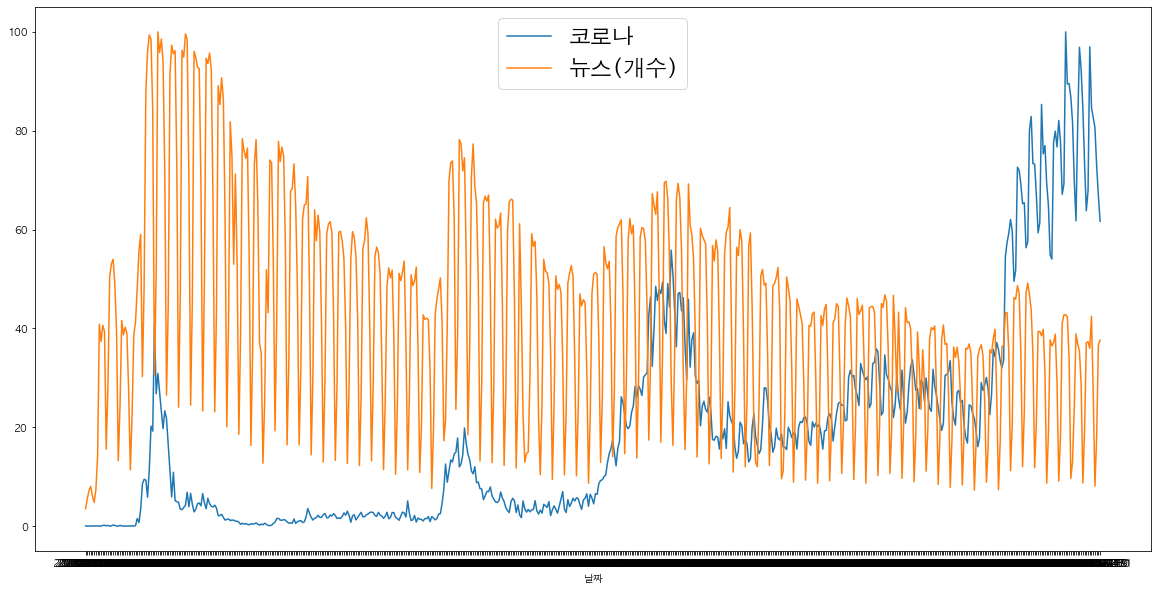

In [193]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.plot(data["날짜"], data["코로나(%)"])
plt.plot(data["날짜"], data["뉴스(%)"])
plt.xlabel("날짜")
plt.legend(["코로나", "뉴스(개수)"], fontsize = 22)
plt.gcf().savefig("./PNG/코로나_뉴스_날짜별_그래프.png")
plt.show()